<a href="https://colab.research.google.com/github/renad30/AIBootCamp_AIP_projects/blob/main/Day3_Covid19_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

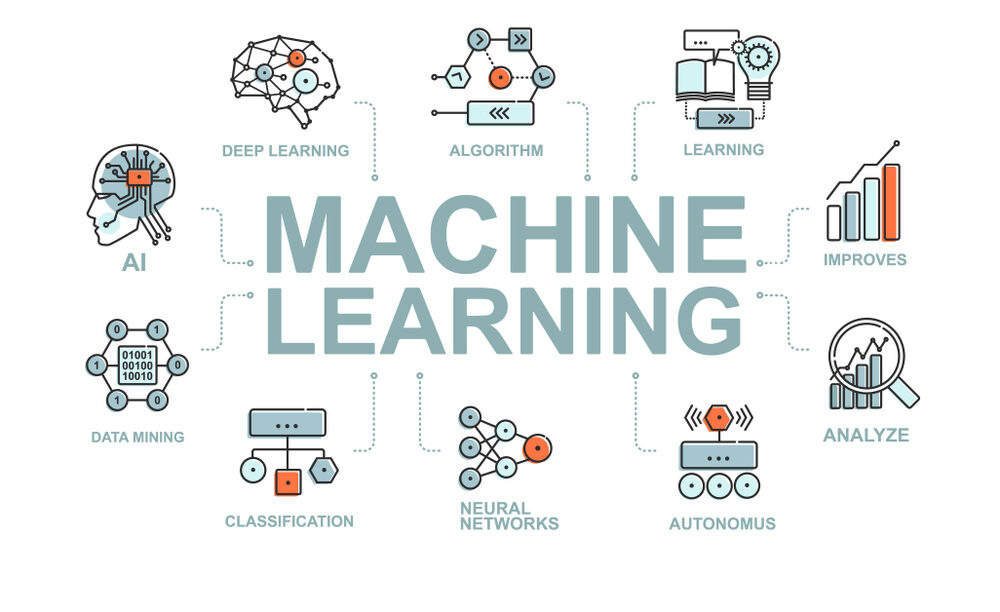

# COVID 19 Detection using Logistic Regression

## Data Description
The covid_dataset we'll use is fake generated data that comprises the following features:

- Age: Represents the age of the patients in years. It ranges from 18 to 89.

- Temperature: Indicates the body temperature of the patients. The values are normally distributed around 37.5 with a standard deviation of 0.5.

- Cough: Indicates whether the patients have a cough. It is a categorical feature with two options: "Yes" or "No".

- Sore Throat: Indicates whether the patients have a sore throat. It is a categorical feature with two options: "Yes" or "No".

- Fatigue: Indicates whether the patients experience fatigue. It is a categorical feature with two options: "Yes" or "No".

- Daily Vitamin D Intake: Represents the daily intake of vitamin D in International Units (IU). The values range from 400 to 2000 and are randomly generated.

- COVID-19 Positive: Indicates whether the patients are COVID-19 positive. It is a categorical target variable with two options: "Yes" or "No".

In [1]:
import pandas as pd
data = pd.read_csv('covid_dataset.csv')
data

,Age,Temperature,Cough,Sore Throat,Fatigue,Daily Vitamin D Intake,COVID-19 Positive
0,69,37.371591,No,Yes,Yes,542,Yes
1,32,38.012143,No,Yes,No,1624,No
2,89,36.688738,Yes,No,No,1603,No
3,78,37.670494,Yes,Yes,Yes,1113,Yes
4,38,37.512786,Yes,No,No,1787,No
...,...,...,...,...,...,...,...
995,27,37.580782,Yes,Yes,Yes,1952,No
996,51,37.200816,No,Yes,Yes,1974,No
997,72,38.320523,Yes,No,No,703,No
998,49,37.624599,No,No,Yes,1341,No


# Data Exploration

In [2]:
data.columns

Index(['Age', 'Temperature', 'Cough', 'Sore Throat', 'Fatigue',
       'Daily Vitamin D Intake', 'COVID-19 Positive'],
      dtype='object')

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     1000 non-null   int64  
 1   Temperature             1000 non-null   float64
 2   Cough                   1000 non-null   object 
 3   Sore Throat             1000 non-null   object 
 4   Fatigue                 1000 non-null   object 
 5   Daily Vitamin D Intake  1000 non-null   int64  
 6   COVID-19 Positive       1000 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB
None


In [4]:
import matplotlib.pyplot as plt

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Age                       0
Temperature               0
Cough                     0
Sore Throat               0
Fatigue                   0
Daily Vitamin D Intake    0
COVID-19 Positive         0
dtype: int64


In [5]:
# Calculate statistical measures
statistics = data.describe()
statistics


,Age,Temperature,Daily Vitamin D Intake
count,1000.000000,1000.000000,1000.000000
mean,52.881000,37.531243,1200.279000
std,20.958915,0.510427,459.931364
min,18.000000,35.824195,403.000000
25%,34.750000,37.191691,814.000000
50%,52.500000,37.526769,1199.000000
75%,71.000000,37.880216,1612.250000
max,89.000000,39.083686,1999.000000


Let's create a separate plot for temperature

Temperature higher than the maximum or lower than the minimum might not always be outliers!

## Fix Data Types

In [6]:

# Define the encoding dictionary
encoding_dict = {
    'Cough': {'No': 0, 'Yes': 1},
    'Sore Throat': {'No': 0, 'Yes': 1},
    'Fatigue': {'No': 0, 'Yes': 1},
    'COVID-19 Positive': {'No': 0, 'Yes': 1}
}

# Apply encoding to the DataFrame
data.replace(encoding_dict, inplace=True)

# Display the updated DataFrame
data.head()

,Age,Temperature,Cough,Sore Throat,Fatigue,Daily Vitamin D Intake,COVID-19 Positive
0,69,37.371591,0,1,1,542,1
1,32,38.012143,0,1,0,1624,0
2,89,36.688738,1,0,0,1603,0
3,78,37.670494,1,1,1,1113,1
4,38,37.512786,1,0,0,1787,0


# Feature Engineering

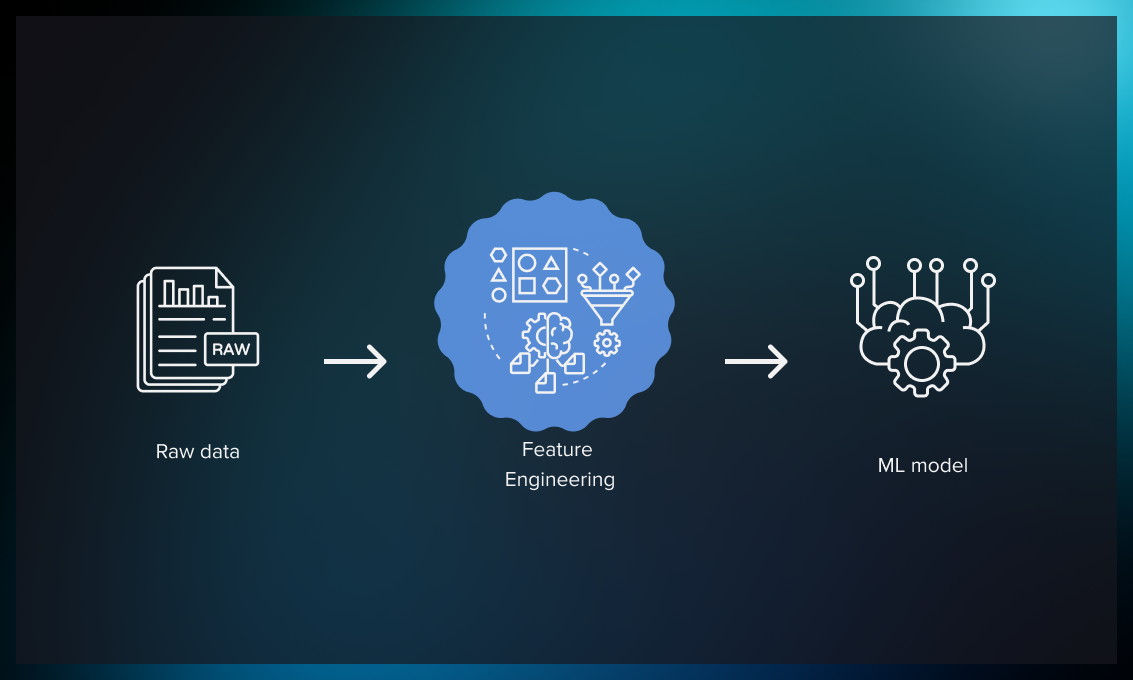

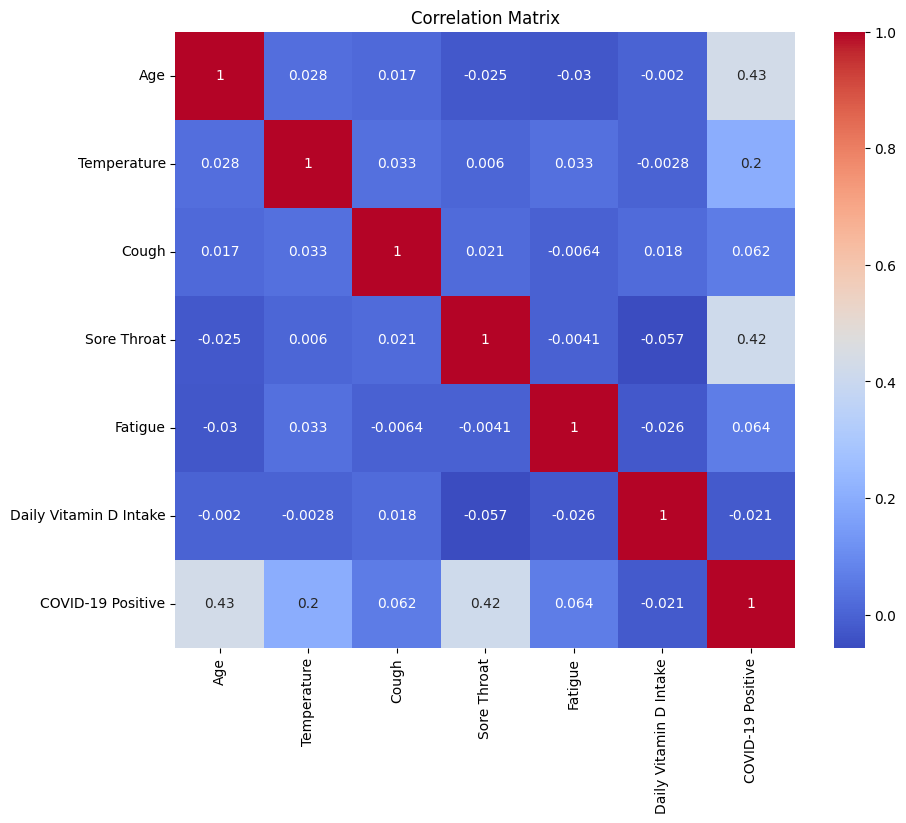

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#Removing Outliers
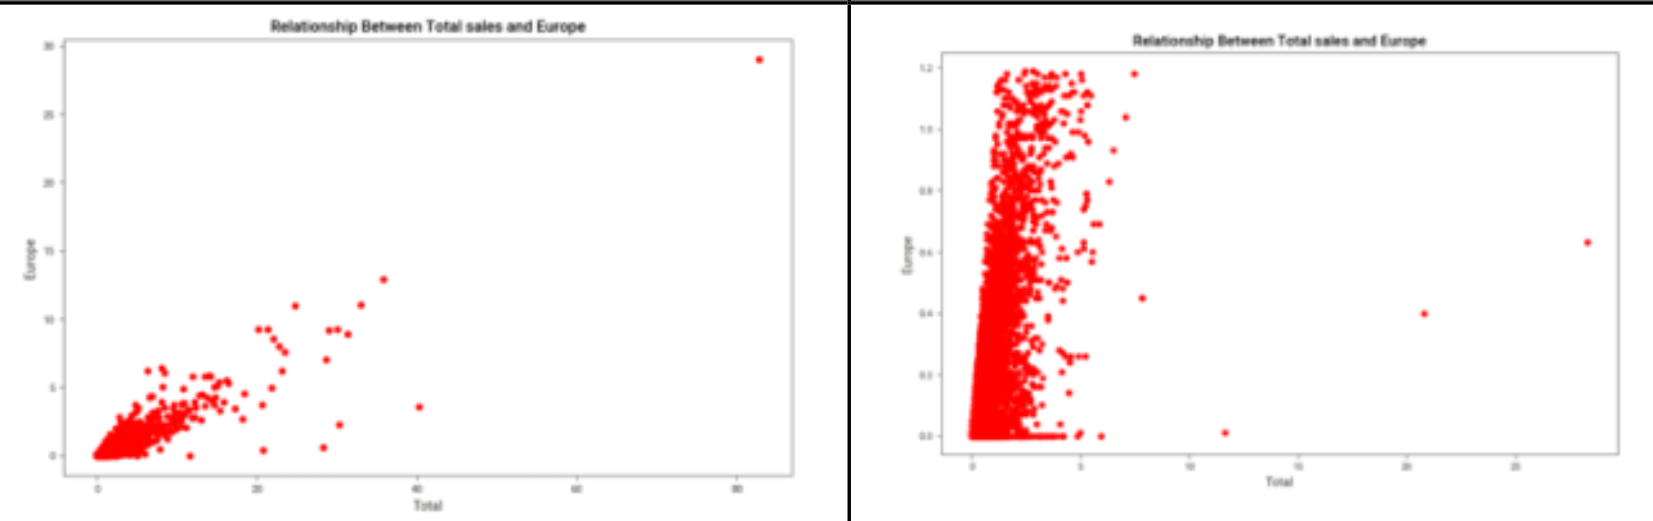

Text(0, 0.5, 'Temperature')

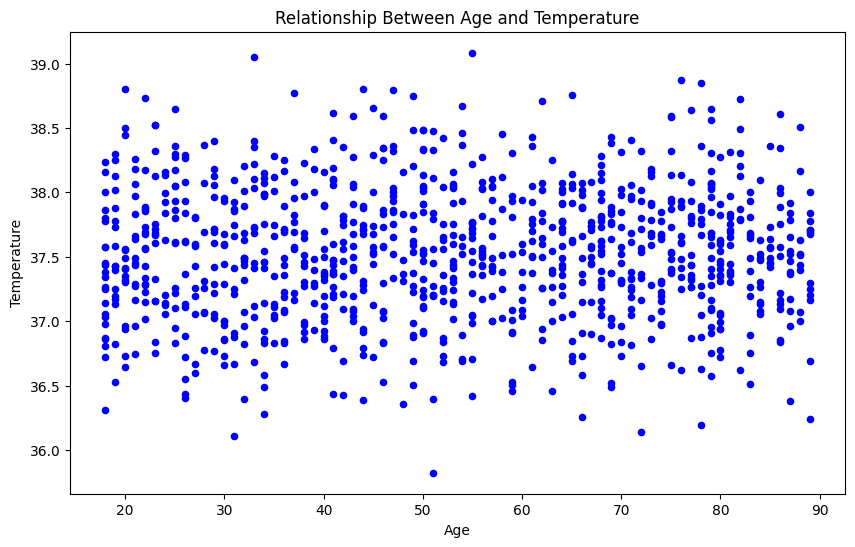

In [8]:
data.plot(kind="scatter" , x="Age" , y = "Temperature" , figsize=(10,6) , color = "b")
plt.title("Relationship Between Age and Temperature")
plt.xlabel("Age")
plt.ylabel("Temperature")

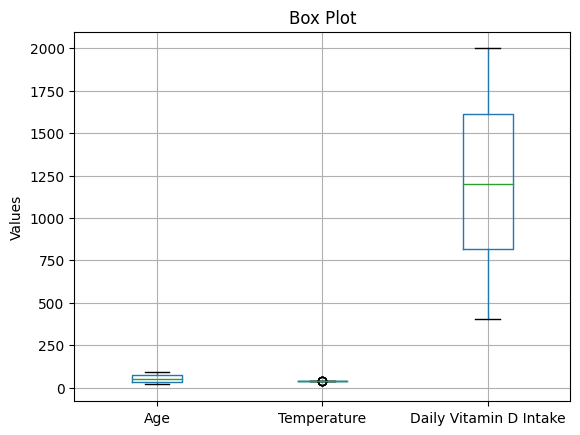

In [9]:
# Create a box plot for outlier detection
data.boxplot(column=['Age', 'Temperature', 'Daily Vitamin D Intake'])
plt.title('Box Plot')
plt.ylabel('Values')
plt.show()

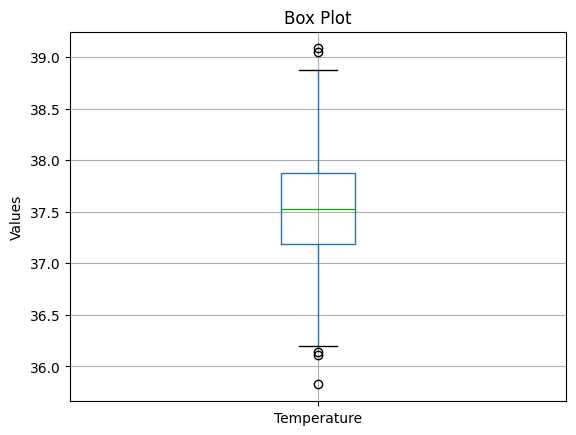

In [10]:
data.boxplot(column=['Temperature'])
plt.title('Box Plot')
plt.ylabel('Values')
plt.show()

## Modeling

### Split the Data

In [11]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Split the data into features (X) and target (y)
X = data.drop('COVID-19 Positive', axis=1)
y = data['COVID-19 Positive']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #random state tskes randoms values for x,y
                                                                                          #يثبت الاكس والواي عشان خلاص مو كل مرة يعطي قيم جديدة
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(800, 6)
(200, 6)
(800,)
(200,)


### Fit and evaluate the classifier

In [12]:

# Create a logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)



In [13]:
result = pd.DataFrame({'Actual': y_test, 'Predict' : y_pred})
result

,Actual,Predict
521,0,0
737,0,1
740,1,1
660,0,0
411,1,1
...,...,...
408,0,0
332,0,0
208,0,0
613,0,0


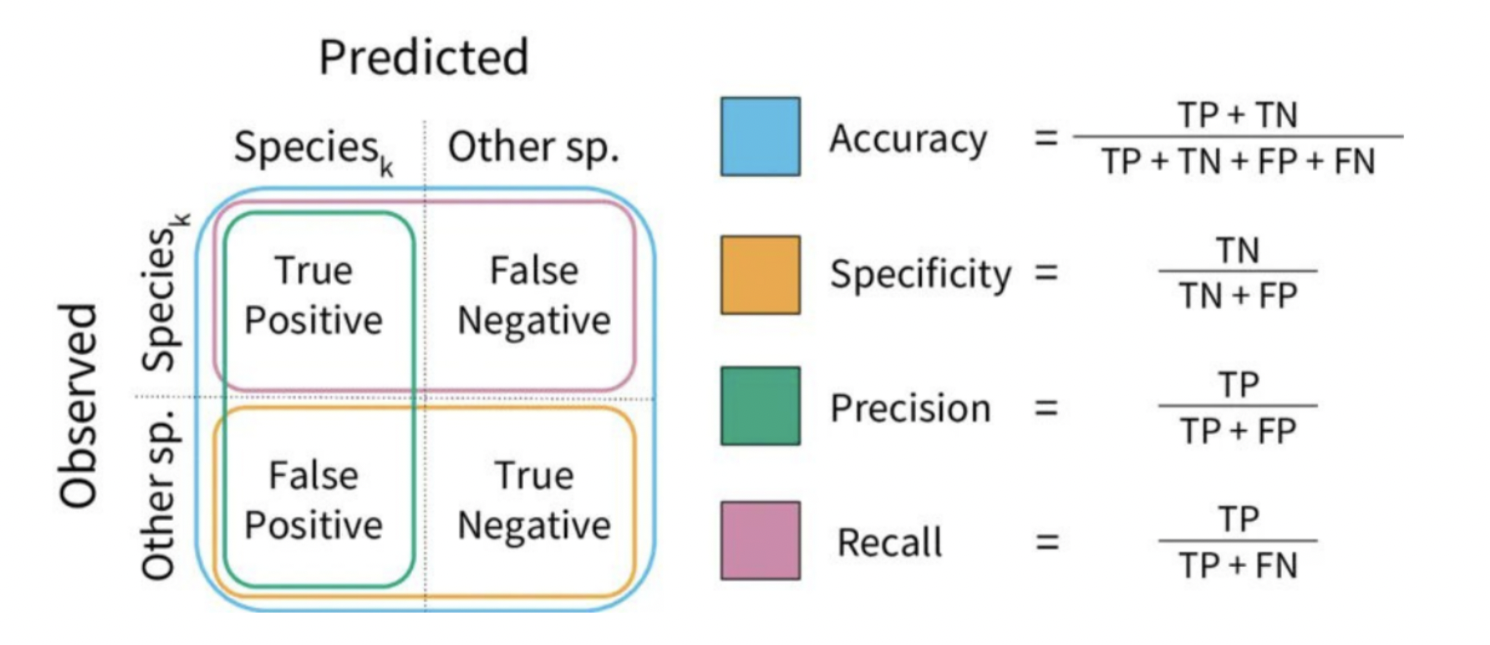

- TN / True Negative: the case was negative and predicted negative
- TP / True Positive: the case was positive and predicted positive
- FN / False Negative: the case was positive but predicted negative
- FP / False Positive: the case was negative but predicted positive

In [14]:
# Calculate the accuracy of the model
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.915
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       166
           1       0.73      0.79      0.76        34

    accuracy                           0.92       200
   macro avg       0.84      0.87      0.85       200
weighted avg       0.92      0.92      0.92       200



- **Recall** means "how many of this class you find over the whole number of element of this class"

- **Precision** will be "how many are correctly classified among that class"

- **F1-score** is the harmonic mean between precision & recall

- **Support** is the number of occurence of the given class in your dataset (so you have 37.5K of class 0 and 37.5K of class 1, which is a really well balanced dataset.

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[156  10]
 [  7  27]]
